In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/6321_project')
os.listdir()

['processed_data',
 'trainers',
 'models',
 'data_processor',
 'data_loader',
 'jupyter',
 'loggers',
 'saved_models',
 'model']

## switch to the root dir

In [4]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.MusicCRDNN import MusicCRDNN
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn


## Load preprocessed data

In [5]:
X_train, y_train, X_val, y_val = load_numpy_arrays(['data_train_X.npy','data_train_y.npy', 'data_val_X.npy','data_val_y.npy']
                  , path_prefix='processed_data/processed_waves/10-genres/')

In [6]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [7]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [8]:
print(X_train.shape)
print(y_train.shape)

torch.Size([2390, 501, 40])
torch.Size([2390])


In [9]:
print(X_train[0])
print(y_train[0])

tensor([[ 0.4324,  0.5236,  0.5394,  ...,  0.7697,  0.7055,  0.3866],
        [ 0.7034,  0.6647,  0.4897,  ...,  0.4557,  0.3747,  0.2816],
        [ 0.6879,  0.5071,  0.1787,  ...,  0.1181,  0.2188,  0.3338],
        ...,
        [ 0.9628,  0.9904,  0.9130,  ...,  0.3897,  0.3010,  0.0407],
        [ 0.8118,  0.8570,  0.7527,  ...,  0.1811,  0.2039, -0.0195],
        [ 0.4746,  0.5449,  0.4947,  ..., -0.2057, -0.4388, -0.4447]])
tensor(0)


In [10]:
print(X_val.shape)
print(y_val.shape)

torch.Size([299, 501, 40])
torch.Size([299])


## Load model

1. define model under the folder models
2. import and define the model

In [12]:
model = MusicCRDNN([8, 32, 64, 64], 10, 128, 256, 5, [60])

In [13]:
n_feat = X_train.shape[2]
n_time = X_train.shape[1]

In [14]:
X_a = X_train[:10].reshape((-1, 1, n_time, n_feat))
pred = model(X_a)

## Define loss and optimizer

In [15]:
lr = 0.001
batch_size = 200
num_epoch = 200
model_name = 'CRNN'
saved_model_name = 'saved_models/saved_' + model_name + '_wave.pt'

In [16]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [ ]:
X_train_2d = X_train.reshape((-1, 1, n_time, n_feat))
print(X_train.shape)
X_val_2d = X_val.reshape((-1, 1, n_time, n_feat))
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train_2d, y_train, X_val_2d, y_val), loss, optimizer, batch_size=batch_size, num_epoch=num_epoch, device='cuda', saved_model_name=saved_model_name)

torch.Size([2390, 501, 40])
Epoch  0: loss on final training batch: 2.1497
training accuracy: 18.95% validation accuracy: 13.04%
Epoch  1: loss on final training batch: 1.9863
training accuracy: 31.84% validation accuracy: 32.78%
Epoch  2: loss on final training batch: 1.7108
training accuracy: 36.86% validation accuracy: 37.79%
Epoch  3: loss on final training batch: 1.5843
training accuracy: 44.10% validation accuracy: 45.48%
Epoch  4: loss on final training batch: 1.4170
training accuracy: 50.46% validation accuracy: 44.15%
Epoch  5: loss on final training batch: 1.2967
training accuracy: 52.59% validation accuracy: 49.83%
Epoch  6: loss on final training batch: 1.2233
training accuracy: 58.24% validation accuracy: 60.54%
Epoch  7: loss on final training batch: 1.2325
training accuracy: 58.20% validation accuracy: 54.85%
Epoch  8: loss on final training batch: 1.1338
training accuracy: 63.10% validation accuracy: 59.20%
Epoch  9: loss on final training batch: 0.9742
training accurac

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

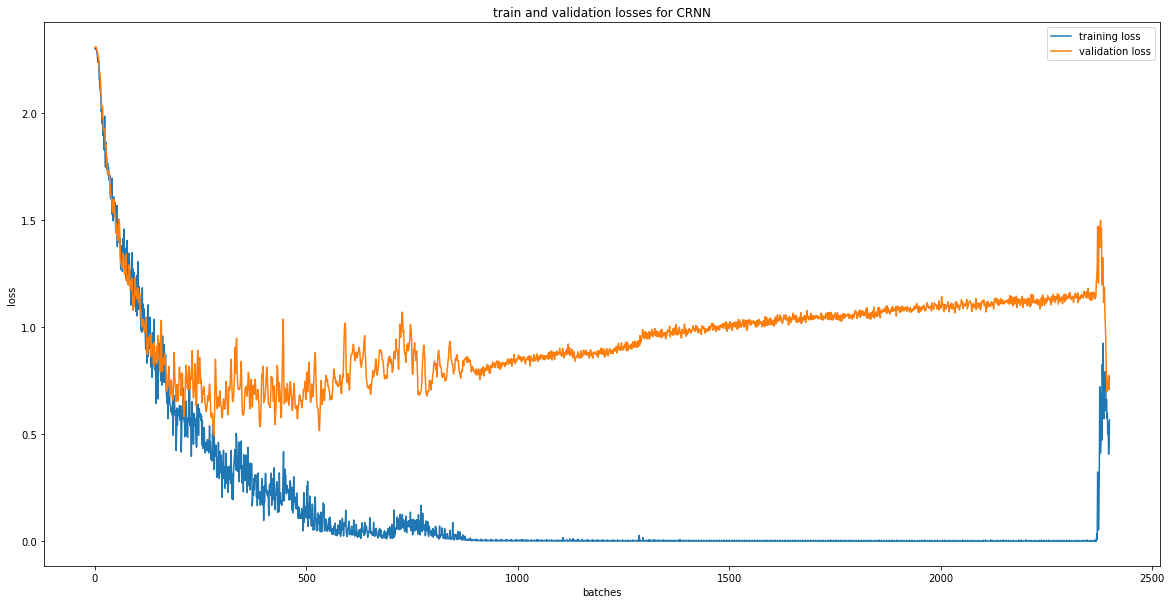

In [18]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

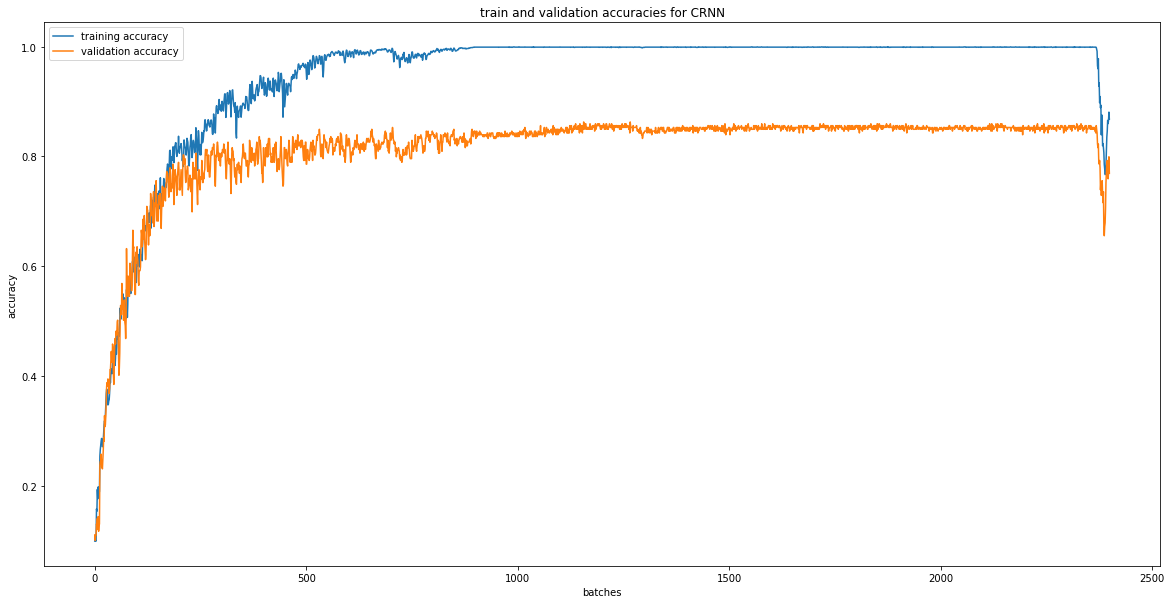

In [19]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for ' + model_name)